# Support Vector Machines

## Setup

In [1]:
## this is Colab-specific; remove if you are not using Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
## adapt this directory to your needs
base_dir = '/content/drive/MyDrive/'
notebook_dir = base_dir + 'Colab\ Notebooks/MLTeaching/'
data_dir = base_dir + 'Work/DataSets/'

In [3]:
## if using Colab, you need to run this every time you start a notebook
## on a local installation, you only need to run this once (or install the
## packages outside of the notebook once and for all)
!pip install git+https://github.com/UBod/pyMLaux.git
!pip install Bio strkernel

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/UBod/pyMLaux.git to /tmp/pip-req-build-gkl4_war
  Running command git clone --filter=blob:none --quiet https://github.com/UBod/pyMLaux.git /tmp/pip-req-build-gkl4_war
  Resolved https://github.com/UBod/pyMLaux.git to commit e9defd85bab5f5d89548b7494071561c81ae8517
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for pyMLaux: filename=pyMLaux-0.0.5-py3-none-any.whl size=6795 sha256=96cb2461794b71fe17a076e54faf3fbb6ceda3a5c4c52c7433fb8e1735fcf308
  Stored in directory: /tmp/pip-ephem-wheel-cache-2dhs_2q3/wheels/04/d3/4b/95324531ee12976752872ed3ea1a73976f19f607202f6af0c8
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=6dbca36557151a222e4868f6d80898c9f04362f0af51e019d5aa72a0234186e2
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, LeaveOneOut, cross_validate, GridSearchCV
from sklearn import metrics

from xgboost import XGBClassifier

from Bio.Seq import Seq
from strkernel.gappy_kernel import gappypair_kernel as gk

from pyMLaux import plot_2d_prediction, show_img_data

## Simple Example (Fish Data)



In [5]:
fish_data_raw = pd.read_csv(data_dir + 'fish.csv', sep=',')
fish_data = {'data': np.array(fish_data_raw.iloc[:, :-1]),
             'target': (np.array(fish_data_raw.iloc[:, -1]) + 1) / 2,
             'feature_names': fish_data_raw.columns[:-1],
             'target_names': ['Salmon', 'Sea bass']}

In [6]:
svm_model1 = SVC(kernel='linear', C=100000)
svm_model1.fit(X=fish_data['data'], y=fish_data['target'])

SVC(C=100000, kernel='linear')

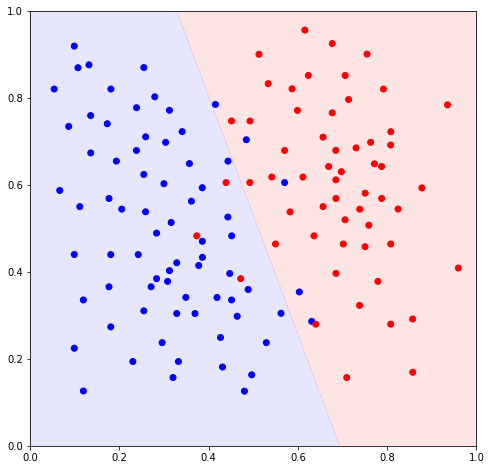

In [7]:
plot_2d_prediction(fish_data['data'], fish_data['target'], svm_model1.decision_function, 
                   xval=np.linspace(0, 1, 201), yval=np.linspace(0, 1, 201))

In [8]:
svm_model2 = SVC(kernel='rbf', C=12, gamma=1.8)
svm_model2.fit(X=fish_data['data'], y=fish_data['target'])

SVC(C=12, gamma=1.8)

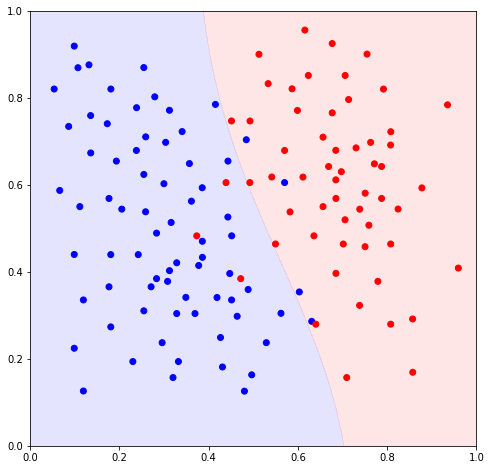

In [9]:
plot_2d_prediction(fish_data['data'], fish_data['target'], svm_model2.decision_function, 
                   xval=np.linspace(0, 1, 101), yval=np.linspace(0, 1, 101))

In [10]:
svm_model3 = SVC(kernel='rbf', C=1000000, gamma=20)
svm_model3.fit(X=fish_data['data'], y=fish_data['target'])

SVC(C=1000000, gamma=20)

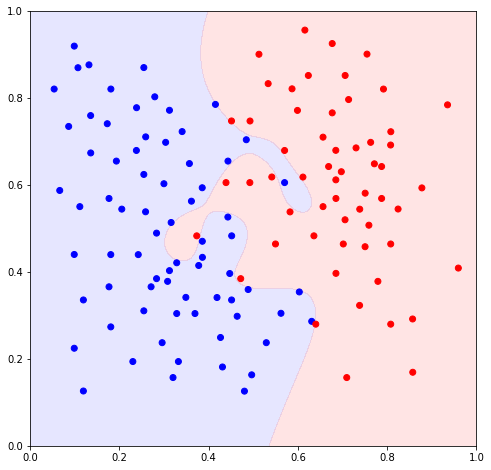

In [11]:
plot_2d_prediction(fish_data['data'], fish_data['target'], svm_model3.decision_function, 
                   xval=np.linspace(0, 1, 101), yval=np.linspace(0, 1, 101))

## Simple Digit Recognition Example 

In [12]:
dig_train_raw = pd.read_csv(data_dir + '/Digits_training.csv', sep=',')
dig_train = {'data': np.array(dig_train_raw.iloc[:, :-1]),
             'target': np.array(dig_train_raw.iloc[:, -1]),
             'feature_names': dig_train_raw.columns[:-1],
             'target_names': [str(i) for i in range(0, 10)]}

In [13]:
dig_test_raw = pd.read_csv(data_dir + '/Digits_test.csv', sep=',')
dig_test = {'data': np.array(dig_test_raw.iloc[:, :-1]),
            'target': np.array(dig_test_raw.iloc[:, -1]),
            'feature_names': dig_test_raw.columns[:-1],
            'target_names': [str(i) for i in range(0, 10)]}

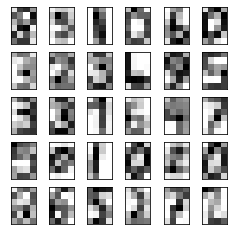

In [14]:
show_img_data(dig_train['data'].reshape((dig_train['data'].shape[0], 6, 4, 1)), figsize=(4, 4), interpolation=None)

In [15]:
dig_train['target'][range(0, 30)].reshape(5, 6)

array([[8, 5, 1, 0, 6, 0],
       [3, 2, 3, 4, 9, 5],
       [3, 3, 1, 6, 4, 7],
       [5, 0, 1, 0, 2, 0],
       [2, 6, 5, 2, 7, 2]])

### Try Linear SVM

In [16]:
parameters = {'C': [2**i for i in range(-5, 6)]}
svmL_models = GridSearchCV(SVC(kernel='linear'), parameters, cv=10, n_jobs=-1)

In [17]:
svmL_models.fit(dig_train['data'], dig_train['target'])

GridSearchCV(cv=10, estimator=SVC(kernel='linear'), n_jobs=-1,
             param_grid={'C': [0.03125, 0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8,
                               16, 32]})

In [18]:
pd.DataFrame(svmL_models.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.332923,0.011235,0.039669,0.008839,0.03125,{'C': 0.03125},0.790000,0.803333,0.856667,0.850000,0.856667,0.860000,0.856667,0.860000,0.863333,0.860000,0.845667,0.024902,11
1,0.341146,0.099860,0.043090,0.013595,0.0625,{'C': 0.0625},0.810000,0.813333,0.880000,0.850000,0.880000,0.866667,0.883333,0.876667,0.870000,0.883333,0.861333,0.026592,10
2,0.369984,0.055319,0.046972,0.014540,0.125,{'C': 0.125},0.826667,0.826667,0.893333,0.866667,0.893333,0.873333,0.900000,0.866667,0.873333,0.896667,0.871667,0.025441,9
3,0.181063,0.006752,0.022485,0.000410,0.25,{'C': 0.25},0.850000,0.850000,0.903333,0.876667,0.900000,0.893333,0.920000,0.870000,0.886667,0.920000,0.887000,0.024058,8
4,0.167032,0.006256,0.020240,0.000724,0.5,{'C': 0.5},0.870000,0.853333,0.900000,0.886667,0.903333,0.893333,0.930000,0.876667,0.890000,0.923333,0.892667,0.022050,4
5,0.164157,0.005369,0.017534,0.000321,1,{'C': 1},0.866667,0.853333,0.903333,0.886667,0.890000,0.896667,0.923333,0.870000,0.890000,0.926667,0.890667,0.022301,6
6,0.172366,0.005208,0.015901,0.000264,2,{'C': 2},0.863333,0.870000,0.893333,0.900000,0.893333,0.896667,0.916667,0.873333,0.883333,0.926667,0.891667,0.019047,5
7,0.191936,0.017270,0.014708,0.000976,4,{'C': 4},0.873333,0.866667,0.893333,0.896667,0.903333,0.890000,0.916667,0.886667,0.880000,0.930000,0.893667,0.018285,2
8,0.205024,0.005220,0.013609,0.000293,8,{'C': 8},0.873333,0.883333,0.890000,0.900000,0.903333,0.886667,0.916667,0.880000,0.886667,0.920000,0.894000,0.014742,1
9,0.238789,0.010334,0.012806,0.000192,16,{'C': 16},0.883333,0.870000,0.893333,0.896667,0.893333,0.903333,0.913333,0.870000,0.883333,0.923333,0.893000,0.016428,3


In [19]:
svmL_models.best_score_

0.8939999999999999

In [20]:
svmL_models.best_params_

{'C': 8}

In [21]:
svmL_models.best_estimator_.score(dig_test['data'], dig_test['target'])

0.8962075848303394

### Try RBF SVM

In [22]:
parameters = {'C': [2**i for i in range(-5, 6)], 'gamma': [2**i for i in range(-5, 6)]}
svmR_models = GridSearchCV(SVC(kernel='rbf'), parameters, cv=10, n_jobs=-1)

In [23]:
svmR_models.fit(dig_train['data'], dig_train['target'])

GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.03125, 0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8,
                               16, 32],
                         'gamma': [0.03125, 0.0625, 0.125, 0.25, 0.5, 1, 2, 4,
                                   8, 16, 32]})

In [24]:
svmR_models.best_score_

0.9543333333333335

In [25]:
svmR_models.best_params_

{'C': 4, 'gamma': 0.5}

In [26]:
svmR_models.best_estimator_.score(dig_test['data'], dig_test['target'])

0.9615768463073853

## Sequence Classification Example

In [27]:
seq_data_raw = pd.read_csv(data_dir + 'promoters.csv', sep=',')
seq_data_raw

,Sequence,Class
0,TACTAGCAATACGCTTGCGTTCGGTGGTTAAGTATGTATAATGCGC...,1
1,TGCTATCCTGACAGTTGTCACGCTGATTGGTGTCGTTACAATCTAA...,1
2,GTACTAGAGAACTAGTGCATTAGCTTATTTTTTTGTTATCATGCTA...,1
3,AATTGTGATGTGTATCGAAGTGTGTTGCGGAGTAGATGTTAGAATA...,1
4,TCGATAATTAACTATTGACGAAAAGCTGAAAACCACTAGAATGCGC...,1
...,...,...
101,CCTCAATGGCCTCTAAACGGGTCTTGAGGGGTTTTTTGCTGAAAGG...,-1
102,GTATTCTCAACAAGATTAACCGACAGATTCAATCTCGTGGATGGAC...,-1
103,CGCGACTACGATGAGATGCCTGAGTGCTTCCGTTACTGGATTGTCA...,-1
104,CTCGTCCTCAATGGCCTCTAAACGGGTCTTGAGGGGTTTTTTGCTG...,-1


In [28]:
seq_input = [Seq(x) for x in seq_data_raw['Sequence']]
seq_features = gk(seq_input, k=6, g=0, t=0, sparse=False)

In [29]:
seq_data = {'data': seq_features,
            'target': (np.array(seq_data_raw.iloc[:, -1]) + 1) / 2,
            'target_names': ['Non-promoter', 'Promoter']}

In [30]:
seq_model = SVC(kernel='linear', C=8)
cv_result = cross_validate(seq_model, seq_data['data'], seq_data['target'], cv=LeaveOneOut(), n_jobs=-1,
                           scoring=['accuracy'])

In [31]:
pd.DataFrame(cv_result)

,fit_time,score_time,test_accuracy
0,0.026716,0.001210,1.0
1,0.024672,0.000963,1.0
2,0.019700,0.001049,1.0
3,0.020222,0.001057,1.0
4,0.025965,0.001031,1.0
...,...,...,...
101,0.030934,0.000755,1.0
102,0.031305,0.000694,1.0
103,0.029672,0.000760,1.0
104,0.025575,0.000770,1.0


In [32]:
pd.DataFrame(cv_result).mean(axis=0)

fit_time         0.028814
score_time       0.001625
test_accuracy    0.990566
dtype: float64

In [33]:
!cd $notebook_dir; jupyter nbconvert --to html SVM.ipynb

[NbConvertApp] Converting notebook SVM.ipynb to html
[NbConvertApp] Writing 444754 bytes to SVM.html
